In [1]:
import pandas
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib import pyplot as plot
%matplotlib inline

In [2]:
train = pandas.read_csv('hw11t5v0_train.txt', sep='\t').values
target = pandas.read_csv('hw11t5v0_target.txt').values
test = pandas.read_csv('hw11t5v0_test.txt', sep='\t').values
target_test = pandas.read_csv('hw11t5v0_target_test.txt').values
concatenated_data = np.concatenate([train, test], axis=0)

In [3]:
colors = [
    (1, 0, 0),
    (0, 1, 0),
    (0, 0, 1)
]

Сначала сделаем pipeline с pca и посмотрим на качетво.

In [4]:
pca_pipeline = Pipeline([('pca', PCA(n_components=2)), ('knn', KNeighborsClassifier())])
pca_pipeline.fit(X=train, y=target)
pca_predictions = pca_pipeline.predict(test)
accuracy_score(pca_predictions, target_test)

/usr/local/lib/python3.6/site-packages/sklearn/pipeline.py:270: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


0.87755102040816324

У TSNE нем метода transform. Поэтому не будем дальше использовать pipeline. Будем делать преобразование в пространоство меньшей размерности сразу на всех данных (и тестовых и обучающих).

In [5]:
knn = KNeighborsClassifier()

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


accuracy=0.8367346938775511


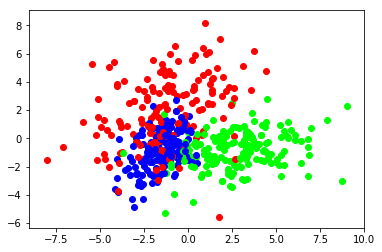

In [6]:
pca = PCA(n_components=2)
modified_data = pca.fit_transform(concatenated_data)
modified_train = modified_data[:len(train)]
modified_test = modified_data[len(train):]
knn.fit(modified_train, target)
pca_predictions = knn.predict(modified_test)
print("accuracy={}".format(accuracy_score(pca_predictions, target_test)))
for i in range(len(modified_train)):
    plot.scatter(modified_train[i][0], modified_train[i][1], color=colors[target[i][0] - 1])

Для tsne еще поперебираем перплексию.

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


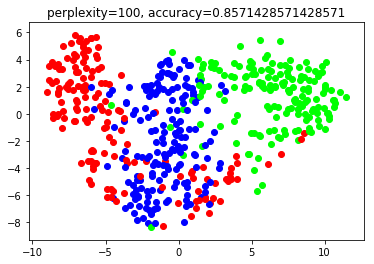

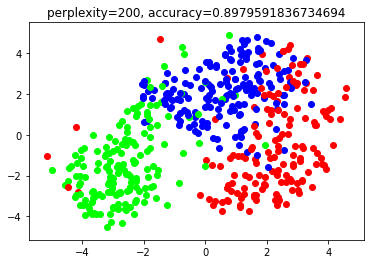

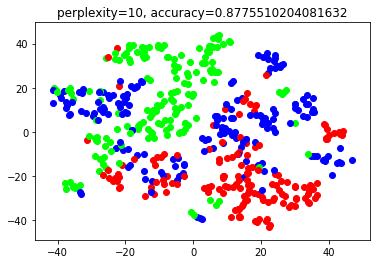

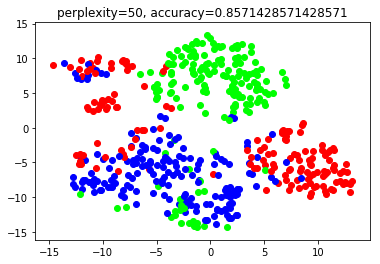

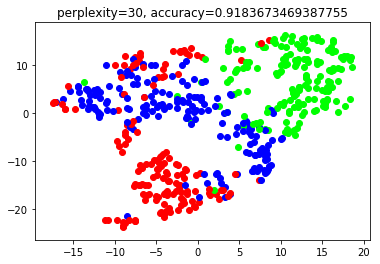

In [7]:
for perplexity in {10, 30, 50, 100, 200}:
    tsne = TSNE(perplexity=perplexity)
    modified_data = tsne.fit_transform(concatenated_data)
    modified_train = modified_data[:len(train)]
    modified_test = modified_data[len(train):]
    knn.fit(modified_train, target)
    tsne_predictions = knn.predict(modified_test)
    accuracy = accuracy_score(tsne_predictions, target_test)
    plot.figure()
    for i in range(len(modified_train)):
        plot.scatter(modified_train[i][0], modified_train[i][1], color=colors[target[i][0] - 1])
        axis = plot.gca()
        axis.set_title("perplexity={}, accuracy={}".format(perplexity, accuracy))

Т.к. тестовая выборка не большая, катринки, пожалуй, даже более информативны, чем значения качества. В целом tsne сработал лучше pca. Это значит, что оптимальное преобразование признаков не линейное.